# CNN Model trained by EMNIST (Byclass)

by 國立中央大學數學系 計算與資料科學組 張軒豪

## Data Preprocessing

In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from mnist import MNIST
from sklearn.model_selection import train_test_split
import tensorflow as tf

batch_size = 128
num_classes = 62
epochs = 5

# Input image dimensions
img_rows, img_cols = 28, 28

emnist_data = MNIST(path='gzip\\', return_type='numpy')
emnist_data.select_emnist('byclass')
x_train, y_train = emnist_data.load_training()
n_train = 697932 #letters : 124800 #697932
x_train = x_train.reshape(n_train, 28, 28,1)
y_train = y_train.reshape(n_train, 1)

x_test, y_test = emnist_data.load_testing()
n_test = 116323
x_test = x_test.reshape(n_test, 28, 28, 1)
y_test = y_test.reshape(n_test, 1)

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(697932, 28, 28, 1)
(116323, 28, 28, 1)
(697932, 1)
(116323, 1)


In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Rescale the image values to [0, 1]
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model Training

In [3]:
# Set the CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Comple the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),  metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [5]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
5453/5453 [==============================] - 796s 146ms/step - loss: 0.7228 - accuracy: 0.7748 - val_loss: 0.4292 - val_accuracy: 0.8469
Epoch 2/5
5453/5453 [==============================] - 800s 147ms/step - loss: 0.5311 - accuracy: 0.8216 - val_loss: 0.4011 - val_accuracy: 0.8557
Epoch 3/5
5453/5453 [==============================] - 755s 138ms/step - loss: 0.4956 - accuracy: 0.8314 - val_loss: 0.3852 - val_accuracy: 0.8598
Epoch 4/5
5453/5453 [==============================] - 709s 130ms/step - loss: 0.4755 - accuracy: 0.8367 - val_loss: 0.3864 - val_accuracy: 0.8586
Epoch 5/5
5453/5453 [==============================] - 663s 122ms/step - loss: 0.4623 - accuracy: 0.8405 - val_loss: 0.3763 - val_accuracy: 0.8630


In [9]:
import numpy as np
np.save('cnn_byclass_history.npy',history.history)
#history=np.load('my_history.npy',allow_pickle='TRUE').item()

## Model Performance

test loss: 0.376300573348999
test accuracy: 0.8629849553108215



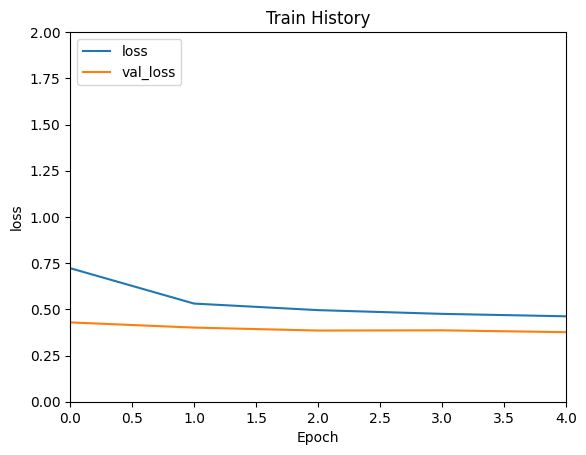

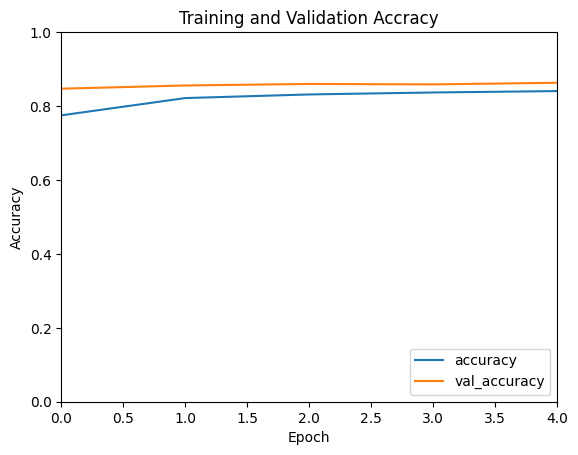

In [21]:
from matplotlib import pyplot as plt
score = model.evaluate(x_test,y_test)
print("test loss:", score[0])
print("test accuracy:", score[1])
print()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.axis([0,4,0,2])
plt.show()
print()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.axis([0,4,0,1])
plt.show()

In [7]:
model.save('emnist_byclass_cnn_model.xml')

INFO:tensorflow:Assets written to: emnist_byclass_cnn_model.xml\assets


INFO:tensorflow:Assets written to: emnist_byclass_cnn_model.xml\assets


In [13]:
from keras.models import load_model
cnn = load_model('emnist_byclass_cnn_model.xml')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.376300573348999
Test accuracy: 0.8629849553108215
